In [48]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [49]:
data = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')

In [50]:
data

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [51]:
# 获取SST数据
sst = data.variables["sst"]

In [52]:
# 定义Niño 3.4区域的经纬度范围
lat_range = slice(5, -5)   # 纬度范围：5N-5S
lon_range = slice(190, 240)   # 经度范围：170W-120W

In [53]:
# 计算Niño 3.4区域每个月的平均值（月平均）
monthly_mean = np.mean(sst[:, lat_range, lon_range])

In [54]:
monthly_mean

<xarray.Variable ()>
array(nan, dtype=float32)

In [55]:
# 计算SST时间序列与每月平均值的差异（异常值）
anomalies = sst[:, lat_range, lon_range] - monthly_mean[:, np.newaxis, np.newaxis]

IndexError: too many indices

In [56]:
# 可视化计算得到的Niño 3.4指数
plt.plot(anomalies.flatten())
plt.xlabel('Time (months)')
plt.ylabel('Niño 3.4 anomalies (°C)')
plt.title('Niño 3.4 Index')
plt.grid(True)
plt.show()

NameError: name 'anomalies' is not defined

In [57]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [58]:
data2 = xr.open_dataset('CERES_EBAF-TOA_200003-201701.nc')

In [59]:
data2

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [60]:
toa_lw_flux = data2['toa_lw_all_mon'].mean(dim='time')
toa_sw_flux = data2['toa_sw_all_mon'].mean(dim='time')
solar_flux = data2['solar_mon'].mean(dim='time')

Text(0.5, 1.0, 'Solar Flux')

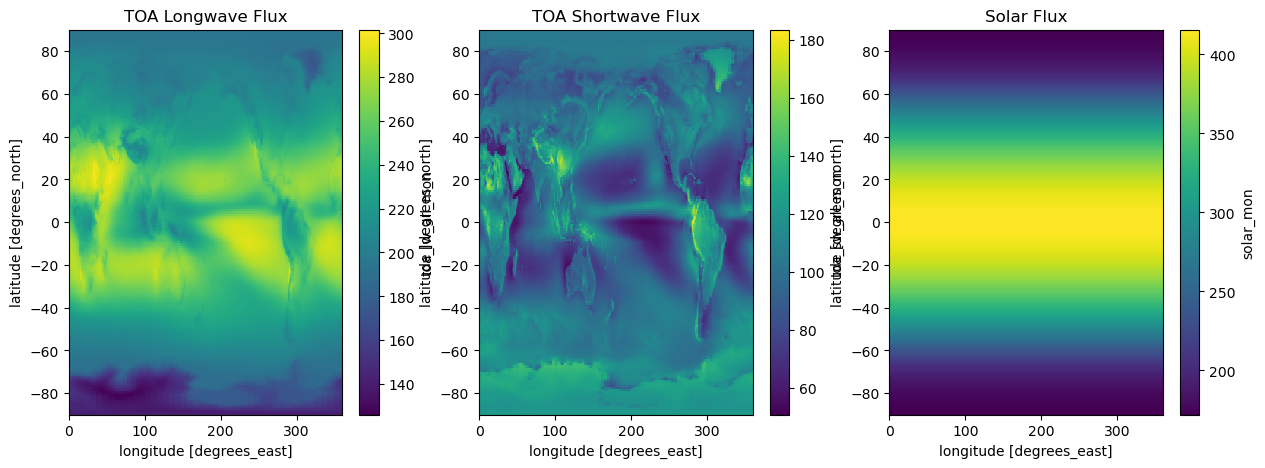

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
toa_lw_flux.plot(ax=axes[0])
axes[0].set_title('TOA Longwave Flux')
toa_sw_flux.plot(ax=axes[1])
axes[1].set_title('TOA Shortwave Flux')
solar_flux.plot(ax=axes[2])
axes[2].set_title('Solar Flux')

Text(0.5, 1.0, 'TOA Net Flux')

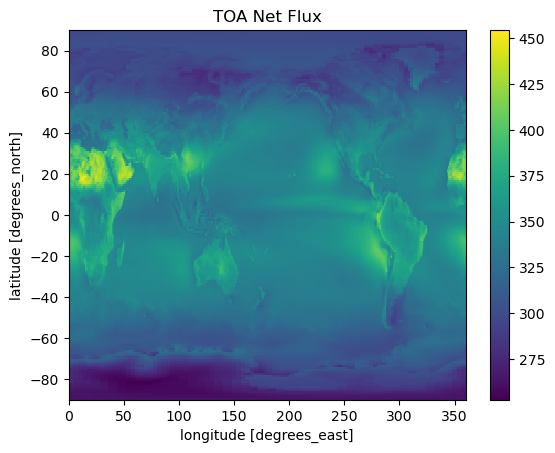

In [62]:
net_flux = toa_sw_flux + toa_lw_flux
fig, ax = plt.subplots()
net_flux.plot(ax=ax)
ax.set_title('TOA Net Flux')

In [63]:
incoming_sw_flux = solar_flux
outgoing_lw_flux = toa_lw_flux
outgoing_sw_flux = toa_sw_flux

Text(0.5, 1.0, 'Outgoing Shortwave Flux')

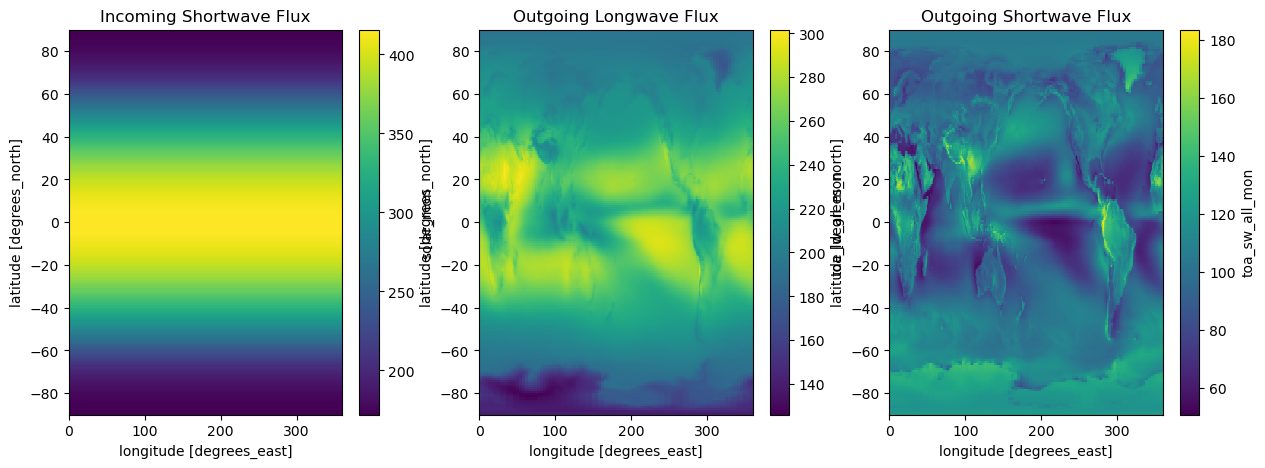

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
incoming_sw_flux.plot(ax=axes[0])
axes[0].set_title('Incoming Shortwave Flux')
outgoing_lw_flux.plot(ax=axes[1])
axes[1].set_title('Outgoing Longwave Flux')
outgoing_sw_flux.plot(ax=axes[2])
axes[2].set_title('Outgoing Shortwave Flux')

Text(0.5, 1.0, 'Net Flux by Latitude Bands')

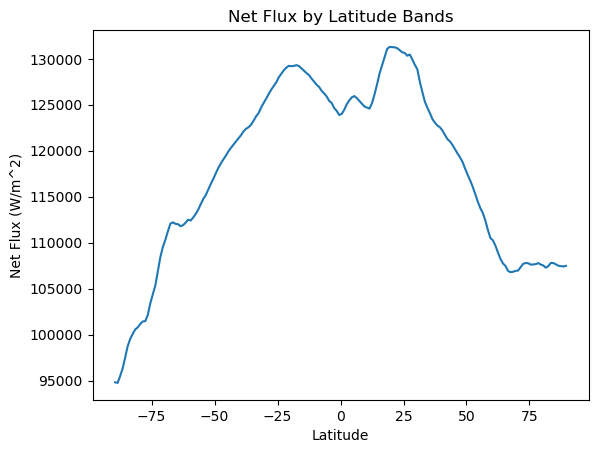

In [65]:
lat_bands = np.arange(-90, 91, 1)
net_flux_lat = net_flux.groupby_bins('lat', lat_bands).mean(dim='lat').sum(dim='lon')
fig, ax = plt.subplots()
net_flux_lat.plot(ax=ax)
ax.set_xlabel('Latitude')
ax.set_ylabel('Net Flux (W/m^2)')
ax.set_title('Net Flux by Latitude Bands')

In [66]:
low_cloud_fraction = data2['toa_lw_clr_mon']
high_cloud_fraction = data2['toa_sw_clr_mon']
outgoing_lw_low = (toa_lw_flux * low_cloud_fraction).mean(dim='time')
outgoing_lw_high = (toa_lw_flux * high_cloud_fraction).mean(dim='time')
outgoing_sw_low = (toa_sw_flux * low_cloud_fraction).mean(dim='time')
outgoing_sw_high = (toa_sw_flux * high_cloud_fraction).mean(dim='time')


Text(0.5, 1.0, 'Outgoing Shortwave Flux (High Clouds)')

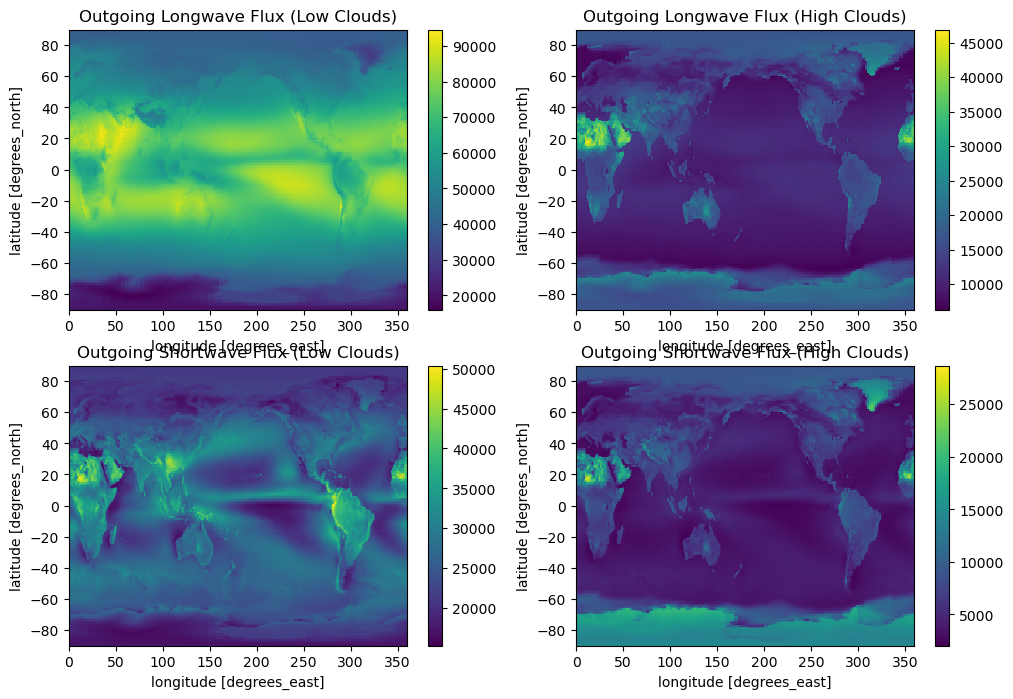

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
outgoing_lw_low.plot(ax=axes[0, 0])
axes[0, 0].set_title('Outgoing Longwave Flux (Low Clouds)')
outgoing_lw_high.plot(ax=axes[0, 1])
axes[0, 1].set_title('Outgoing Longwave Flux (High Clouds)')
outgoing_sw_low.plot(ax=axes[1, 0])
axes[1, 0].set_title('Outgoing Shortwave Flux (Low Clouds)')
outgoing_sw_high.plot(ax=axes[1, 1])
axes[1, 1].set_title('Outgoing Shortwave Flux (High Clouds)')

In [68]:
global_mean_outgoing_lw_low = outgoing_lw_low.mean()
global_mean_outgoing_lw_high = outgoing_lw_high.mean()
global_mean_outgoing_sw_low = outgoing_sw_low.mean()
global_mean_outgoing_sw_high = outgoing_sw_high.mean()

In [69]:
print("低云区出射短波辐射全球平均值：", global_mean_outgoing_sw_low)
print("低云区出射长波辐射全球平均值：", global_mean_outgoing_lw_low)
print("高云区出射短波辐射全球平均值：", global_mean_outgoing_sw_high)
print("高云区出射长波辐射全球平均值：", global_mean_outgoing_lw_high)


低云区出射短波辐射全球平均值： <xarray.DataArray ()>
array(25035.318, dtype=float32)
低云区出射长波辐射全球平均值： <xarray.DataArray ()>
array(57374.293, dtype=float32)
高云区出射短波辐射全球平均值： <xarray.DataArray ()>
array(6655.379, dtype=float32)
高云区出射长波辐射全球平均值： <xarray.DataArray ()>
array(13325.728, dtype=float32)
